In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#1 insertion sort
def insertion_sort(arr, l, r):
    for i in range(l, r):
        temp = arr[i]
        j = i-1
        while j>=0 and arr[j]>temp:
            arr[j+1] = arr[j]
            j = j-1
        arr[j+1] = temp



#2 merge sort
def mergeSort(arr):
  arrLength = len(arr)
  if(arrLength<2):
      return
  halfLength = arrLength//2
  arrLeft = arr[:halfLength]
  arrRight = arr[halfLength:]
  mergeSort(arrLeft)
  mergeSort(arrRight)
  merge(arr,arrLeft,arrRight)
  # print(arr)

def merge(arr, arrLeft, arrRight):
   leftLength = len(arrLeft)
   rightLength = len(arrRight)
   i = j = k = 0
   while i < leftLength and j < rightLength:
        if arrLeft[i] <= arrRight[j]:
           arr[k] = arrLeft[i]
           i = i+1
        else:
          arr[k] = arrRight[j]
          j = j + 1
        k = k+1
   while i < leftLength:
       arr[k] = arrLeft[i]
       i = i+1
       k = k+1
   while j < rightLength:
       arr[k] = arrRight[j]
       j = j + 1
       k = k + 1
   return arr





#3 heap sort
def heap_insert(k, arr):
    n = len(arr)
    if(n==0):
        arr.append(0)
        #n = len(arr)+1
    arr.append(k)
    i = n
    # print(i,"lenth:",len(arr),"n=",n)
    while i>1 and arr[int(i/2)] > arr[i]:
        arr[int(i/2)], arr[i] = arr[i],arr[int(i/2)]
        i = int(i/2)
    # print("from insert",arr)

def heap_remove_min(arr):
    n = len(arr)-1
    temp = arr[1]
    arr[1] = arr[n]
    arr.pop()
    i = 1
    j = 0
    while i<n:
        if 2*i+1<n:
            if arr[2*i+1]<arr[2*i]:
                if arr[2*i+1]<arr[i]:
                    j = 2*i + 1
                else:
                    return temp
            else:
                if arr[2*i]<arr[i]:
                    j = 2*i
                else:
                    return temp
        elif 2*i<n:
            # print("2nd if: n=",n," i=", "a[2*i]=", arr[2*i],"a[i]=", arr[i])
            if arr[2*i] < arr[i]:
                j = 2*i
            else:
                return temp
        else:
            return temp
        arr[j], arr[i] = arr[i], arr[j]
        i = j

    return temp

def heap_sort(arr, l,g):
    heap_arr = []
    for i in range (0,len(arr)):
        heap_insert(arr[i], heap_arr)
    sort_arr=[]
    for i in range (1,len(heap_arr)):
        val=heap_remove_min(heap_arr)
        sort_arr.append(val)
    return sort_arr





#4 inplace quicksort
def partition(arr, l, g):
    #pivot = random.randint(l, g)
    pivot = l
    l=l+1
    while l<=g:
        while l<=g and arr[l]<arr[pivot]:
            l = l+1
        while l<=g and arr[g]>arr[pivot]:
            g=g-1
        if l<=g:
            arr[g], arr[l] = arr[l], arr[g]
            l = l+1
            g = g-1
    arr[pivot], arr[g] = arr[g], arr[pivot]

    # print(arr)
    return g

def in_place_quicksort(arr, l, g):
    if l<g:
        in_place = partition(arr, l, g)

        in_place_quicksort(arr, l, in_place-1)
        in_place_quicksort(arr, in_place+1, g)
    return arr




#5 modified quicksort
def mod_quicksort(arr, l, g):
    if len(arr) <= 16:
        insertion_sort(arr, l, g)
    if(l<g):
        med = int((l+g)/2)
        if arr[med] < arr[l]:
            arr[med], arr[l] = arr[l], arr[med]
        if arr[l] > arr[g]:
            arr[l], arr[g] = arr[g], arr[l]
        if arr[g] < arr[med]:
            arr[g], arr[med] = arr[med], arr[g]

        arr[g-1], arr[med] = arr[med], arr[g-1]

        pivot = partition(arr, l, g-1)

        mod_quicksort(arr, l, pivot)
        mod_quicksort(arr, pivot+1, g)
    return arr

#Random Aarry

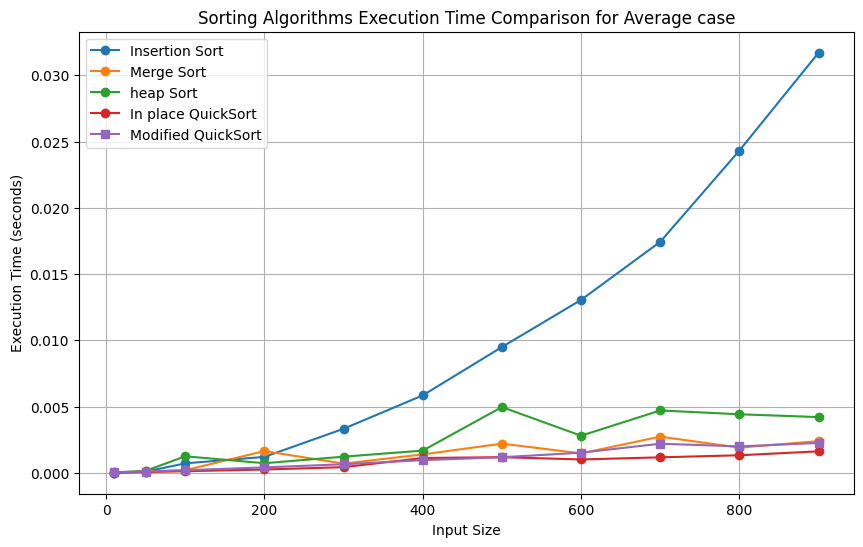

In [ ]:
import random
import timeit
import matplotlib.pyplot as plt

# Define input sizes
input_sizes = [10,50,100, 200, 300, 400,500, 600, 700, 800, 900]

# Define the number of runs to average the time
num_runs = 5

# Function to measure execution time
def measure_time(sort_func, arr):
    start_time = timeit.default_timer()
    if sort_func == mergeSort:
      sort_func(arr.copy())
    else:
      sort_func(arr.copy(), 0, len(arr) - 1)
    return timeit.default_timer() - start_time

def main():
    quicksort_times = []
    mod_quicksort_times = []
    insertionsort_times = []
    mergesort_times=[]
    heapsort_times = []

    for size in input_sizes:
        quicksort_total = 0
        mod_quicksort_total = 0
        insertionsort_total = 0
        mergesort_total = 0
        heapsort_total = 0

        for _ in range(num_runs):
            # Generate random input of current size
            random_list = [random.randint(0, 100000) for _ in range(size)]

            # Measure time for median of three quicksort
            quicksort_total += measure_time(in_place_quicksort, random_list)


            # Measure time for median of three quicksort
            mod_quicksort_total += measure_time(mod_quicksort, random_list)

            # Measure time for insertion sort (on the same input size)
            insertionsort_total += measure_time(insertion_sort, random_list)

            # Measure time for insertion sort (on the same input size)
            mergesort_total += measure_time(mergeSort, random_list)

            # Measure time for heap sort (on the same input size)
            heapsort_total += measure_time(heap_sort, random_list)


        quicksort_times.append(quicksort_total / num_runs)
        mod_quicksort_times.append(mod_quicksort_total / num_runs)
        insertionsort_times.append(insertionsort_total / num_runs)
        mergesort_times.append(mergesort_total / num_runs)
        heapsort_times.append(heapsort_total / num_runs)

    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, insertionsort_times, label="Insertion Sort", marker='o')
    plt.plot(input_sizes, mergesort_times, label="Merge Sort", marker='o')
    plt.plot(input_sizes, heapsort_times, label="heap Sort", marker='o')
    plt.plot(input_sizes, quicksort_times, label="In place QuickSort", marker='o')
    plt.plot(input_sizes, mod_quicksort_times, label="Modified QuickSort", marker='s')


    plt.title('Sorting Algorithms Execution Time Comparison for Average case')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/gdrive/My Drive/random.png', dpi=300, bbox_inches='tight')

    plt.show()

if __name__ == "__main__":
    main()


#Sorted Array

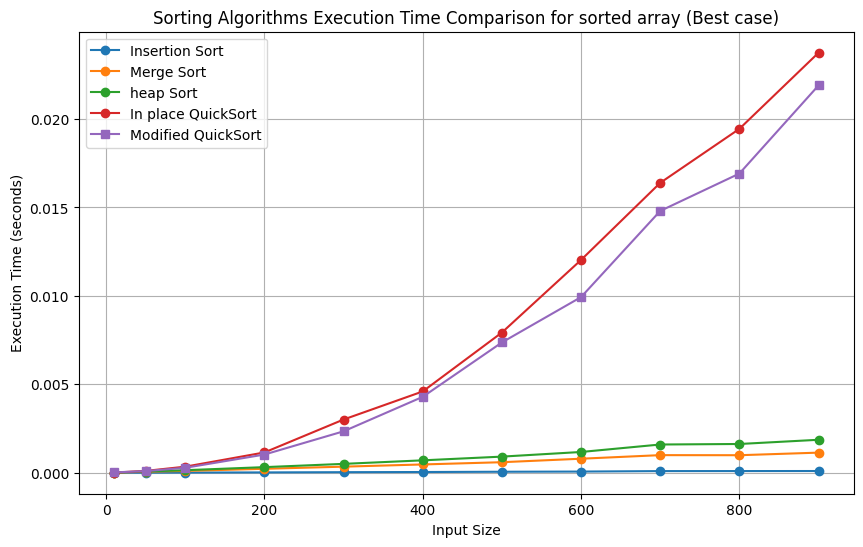

In [ ]:
import random
import timeit
import matplotlib.pyplot as plt

# Define input sizes
input_sizes = [10,50,100,200, 300, 400, 500, 600,700, 800,900]

# Define the number of runs to average the time
num_runs = 5

# measure execution time
def measure_time(sort_func, arr):
    start_time = timeit.default_timer()
    if sort_func == mergeSort:
      sort_func(arr.copy())
    else:
      sort_func(arr.copy(), 0, len(arr) - 1)
    return timeit.default_timer() - start_time


def main():
    quicksort_times = []
    mod_quicksort_times = []
    insertionsort_times = []
    mergesort_times=[]
    heapsort_times = []

    for size in input_sizes:
        quicksort_total = 0
        mod_quicksort_total = 0
        insertionsort_total = 0
        mergesort_total = 0
        heapsort_total = 0

        # Repeat for multiple runs to get average times
        for _ in range(num_runs):
            # Generate random input of current size
            # sorted_list = list(range(0, size))
            random_list = list(range(0, size))


            # Measure time for median of three quicksort
            quicksort_total += measure_time(in_place_quicksort, random_list)


            # Measure time for median of three quicksort
            mod_quicksort_total += measure_time(mod_quicksort, random_list)

            # Measure time for insertion sort (on the same input size)
            insertionsort_total += measure_time(insertion_sort, random_list)

            # Measure time for insertion sort (on the same input size)
            mergesort_total += measure_time(mergeSort, random_list)

            # Measure time for heap sort (on the same input size)
            heapsort_total += measure_time(heap_sort, random_list)

        # Record average times
        quicksort_times.append(quicksort_total / num_runs)
        mod_quicksort_times.append(mod_quicksort_total / num_runs)
        insertionsort_times.append(insertionsort_total / num_runs)
        mergesort_times.append(mergesort_total / num_runs)
        heapsort_times.append(heapsort_total / num_runs)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, insertionsort_times, label="Insertion Sort", marker='o')
    plt.plot(input_sizes, mergesort_times, label="Merge Sort", marker='o')
    plt.plot(input_sizes, heapsort_times, label="heap Sort", marker='o')
    plt.plot(input_sizes, quicksort_times, label="In place QuickSort", marker='o')
    plt.plot(input_sizes, mod_quicksort_times, label="Modified QuickSort", marker='s')


    plt.title('Sorting Algorithms Execution Time Comparison for sorted array (Best case)')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/gdrive/My Drive/sorted.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()


#Reversed Array

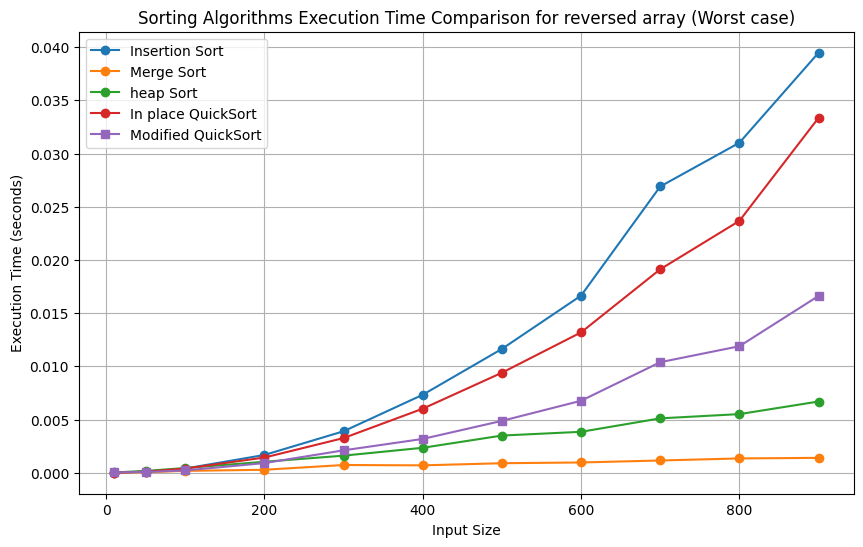

In [ ]:
import random
import timeit
import matplotlib.pyplot as plt

# Define input sizes
input_sizes = [10,50,100,200, 300, 400, 500, 600,700, 800,900]

num_runs = 5

# measure execution time
def measure_time(sort_func, arr):
    start_time = timeit.default_timer()
    if sort_func == mergeSort:
      sort_func(arr.copy())
    else:
      sort_func(arr.copy(), 0, len(arr) - 1)
    return timeit.default_timer() - start_time

def main():
    quicksort_times = []
    mod_quicksort_times = []
    insertionsort_times = []
    mergesort_times=[]
    heapsort_times = []

    for size in input_sizes:
        quicksort_total = 0
        mod_quicksort_total = 0
        insertionsort_total = 0
        mergesort_total = 0
        heapsort_total = 0

        # Repeat for multiple runs to get average times
        for _ in range(num_runs):
            # Generate random input of current size
            # sorted_list = list(range(0, size))
            random_list = list(range(0, size))
            random_list.reverse()
            # print(random_list)

            # Measure time for median of three quicksort
            quicksort_total += measure_time(in_place_quicksort, random_list)


            # Measure time for median of three quicksort
            mod_quicksort_total += measure_time(mod_quicksort, random_list)

            # Measure time for insertion sort (on the same input size)
            insertionsort_total += measure_time(insertion_sort, random_list)

            # Measure time for insertion sort (on the same input size)
            mergesort_total += measure_time(mergeSort, random_list)

            # Measure time for heap sort (on the same input size)
            heapsort_total += measure_time(heap_sort, random_list)

        # Record average times
        quicksort_times.append(quicksort_total / num_runs)
        mod_quicksort_times.append(mod_quicksort_total / num_runs)
        insertionsort_times.append(insertionsort_total / num_runs)
        mergesort_times.append(mergesort_total / num_runs)
        heapsort_times.append(heapsort_total / num_runs)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, insertionsort_times, label="Insertion Sort", marker='o')
    plt.plot(input_sizes, mergesort_times, label="Merge Sort", marker='o')
    plt.plot(input_sizes, heapsort_times, label="heap Sort", marker='o')
    plt.plot(input_sizes, quicksort_times, label="In place QuickSort", marker='o')
    plt.plot(input_sizes, mod_quicksort_times, label="Modified QuickSort", marker='s')


    plt.title('Sorting Algorithms Execution Time Comparison for reversed array (Worst case)')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/gdrive/My Drive/reversed_sorted.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()
